In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
files = [file for file in os.listdir('./oneminutesmarz22')]

marzo = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesmarz22/'+file)
  marzo = pd.concat([marzo, df])

In [4]:
marzo.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,31786,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2022-03-10 00:00:00,231287,0,14.87,32.4,751.0942,NaN,NaN
4,2022-03-10 00:01:00,231288,0,14.86,32.33,751.0976,NaN,NaN


# Arreglando la tabla

In [5]:
marzo.drop(marzo.index[0:3], axis = 0, inplace = True)
marzo.drop(['OneMinute', '31786'],axis='columns', inplace=True)

# Convirtiendolo a float

In [6]:
marzo = marzo.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [8]:
prom_rad = marzo['CR1000X'].mean()
prom_Tamb = marzo['8543.1'].mean()
prom_atm = marzo['CPU:Est_meteo1.CR1X'].mean()
proms_marzo = [prom_rad, prom_Tamb,prom_atm]
marzo.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,240646.500000,271.892596,17.179695,33.131876,752.500539
std,12886.602345,365.914672,3.902614,15.497352,1.827408
min,218327.000000,0.000000,8.820000,3.538000,746.694200
25%,229486.750000,0.000000,14.180000,22.350000,751.179100
50%,240646.500000,1.029000,16.930000,30.655000,752.708200
75%,251806.250000,571.000000,20.570000,41.750000,753.944200
max,262966.000000,1226.000000,27.760000,80.200000,756.413400


In [16]:
marzo.to_csv('marzo22.csv', index=False)
mes = 'Marzo'
anio = '2022'

# Radiacion Marzo

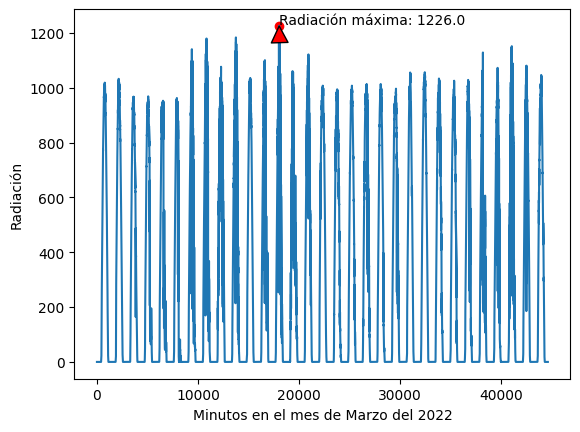

In [25]:
df = pd.read_csv("marzo22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente Marzo

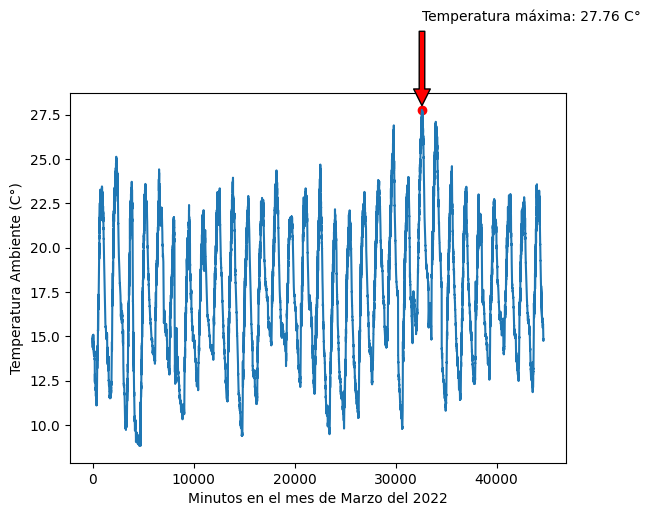

In [27]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion Marzo

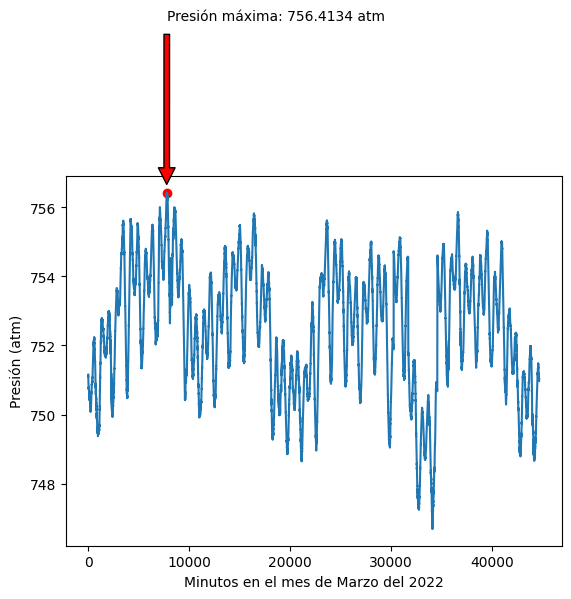

In [26]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()